In [1]:
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
zillow = wrangle.get_zillow()

this file exists, reading from csv


In [3]:
zillow = wrangle.prep_zillow(zillow)

In [4]:
train, validate, test = wrangle.split_zillow(zillow)

In [5]:
train_scaled,val_scaled,test_scaled = wrangle.scaling(train,validate,test)

In [6]:
train_scaled

,Bedroom Count,Bathroom Count,Finished Square Feet,Tax Amount
0,0.277778,0.125000,0.005667,0.007001
1,0.166667,0.062500,0.003165,0.006561
2,0.222222,0.062500,0.002696,0.001040
3,0.166667,0.078125,0.003766,0.003860
4,0.222222,0.062500,0.004285,0.006585
...,...,...,...,...
1284136,0.166667,0.062500,0.002732,0.003706
1284137,0.222222,0.093750,0.005033,0.003929
1284138,0.277778,0.093750,0.003581,0.003628
1284139,0.222222,0.140625,0.006912,0.012074


<div class="alert alert-block alert-success">
    
# Min-Max Scaling
</div>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [23]:
X_train = train.drop(columns=['Tax Value','FIPS','Property Land Use','Year Built'])
y_train = train['Tax Value']

X_val= validate.drop(columns=['Tax Value','FIPS','Property Land Use','Year Built'])
y_val = validate['Tax Value']

X_test = test.drop(columns=['Tax Value','FIPS','Property Land Use','Year Built'])
y_test = test['Tax Value']

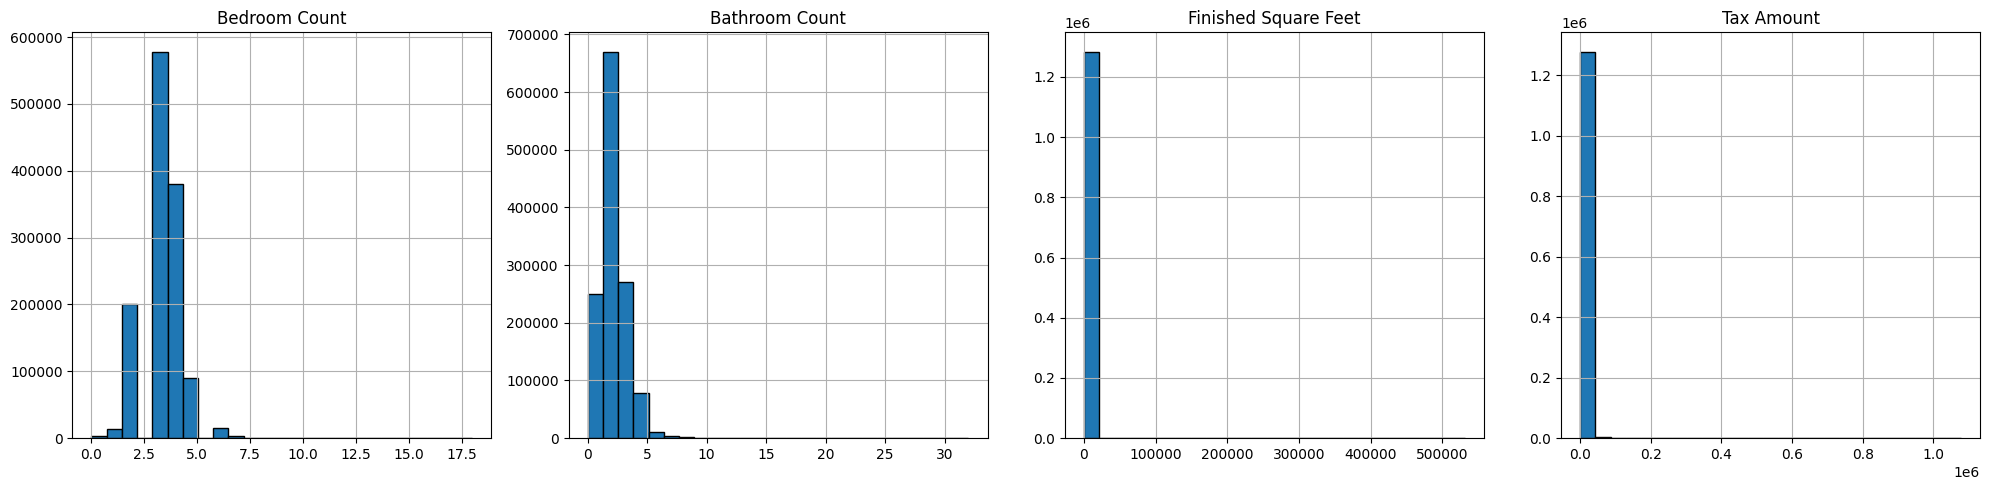

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
X_train.hist(ax=axes,bins=25,edgecolor='black')
plt.tight_layout()
plt.show()

In [27]:
scaler = MinMaxScaler()
train_scaled = pd.DataFrame()
train_scaled[X_train.columns] = scaler.fit_transform(X_train)

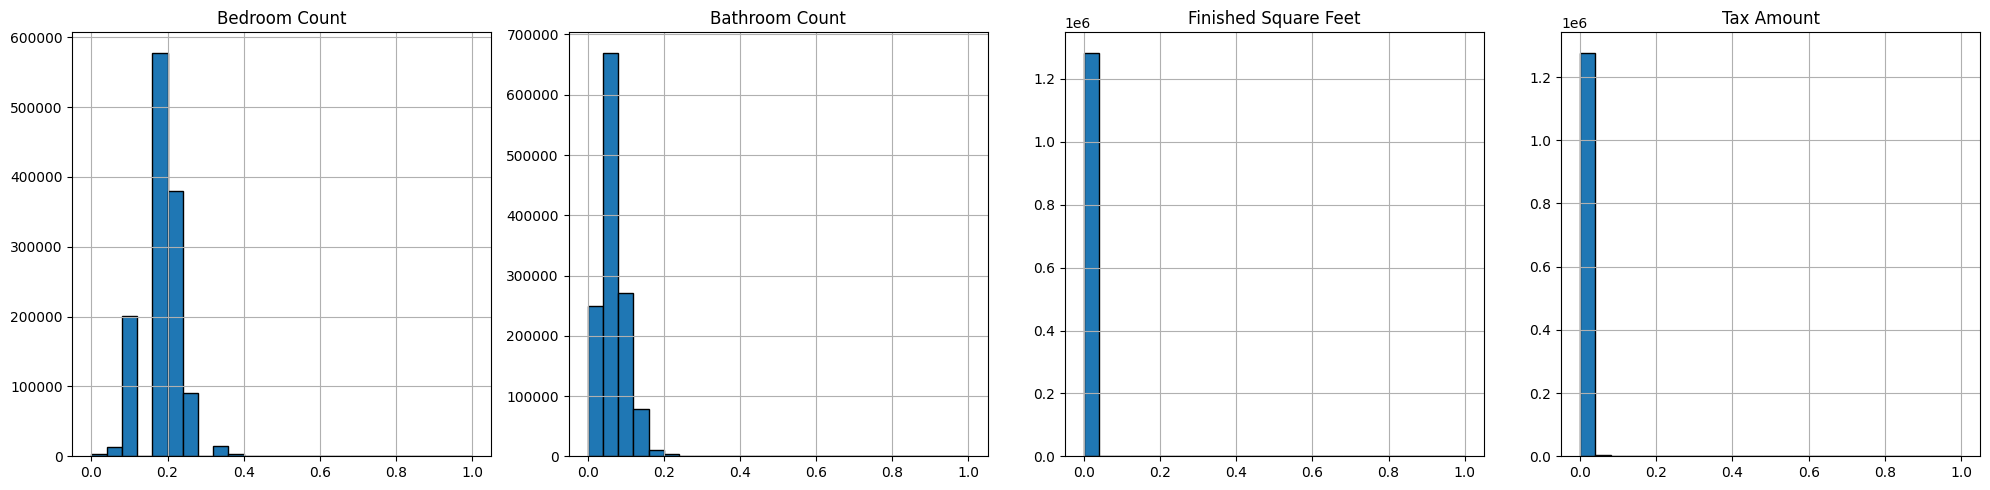

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
train_scaled.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# > Inverse Transform
</div>

In [35]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_reverse = scaler.inverse_transform(X_train_scaled)

In [36]:
(X_train_reverse == X_train).mean()

Bedroom Count           0.927599
Bathroom Count          1.000000
Finished Square Feet    0.988879
Tax Amount              0.973676
dtype: float64

<div class="alert alert-block alert-success">
    
# Quantile Transformer

</div>

In [37]:
scaler = QuantileTransformer(n_quantiles=1000, random_state=123)
train_quantile = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

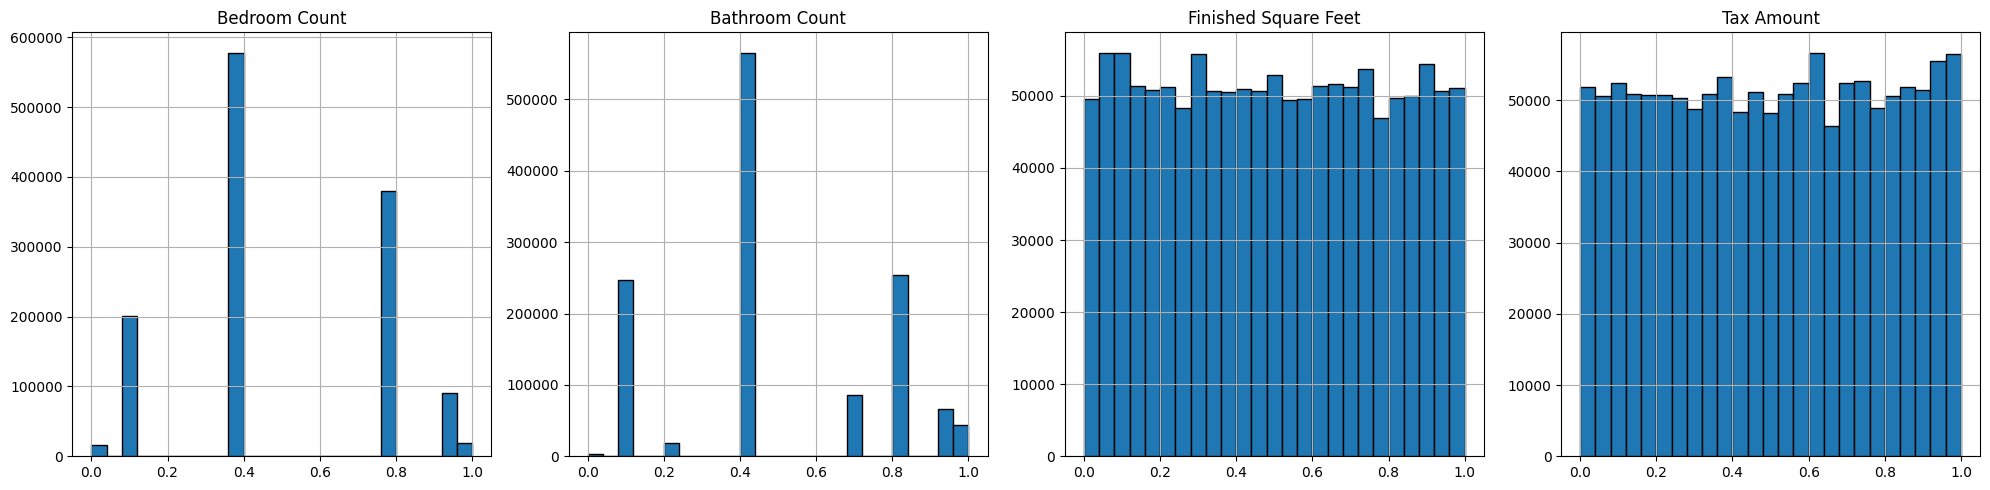

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
train_quantile.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

In [40]:
scaler = QuantileTransformer(n_quantiles=1000, random_state=123, output_distribution='normal', ignore_implicit_zeros=False, copy=True)
train_quantile = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

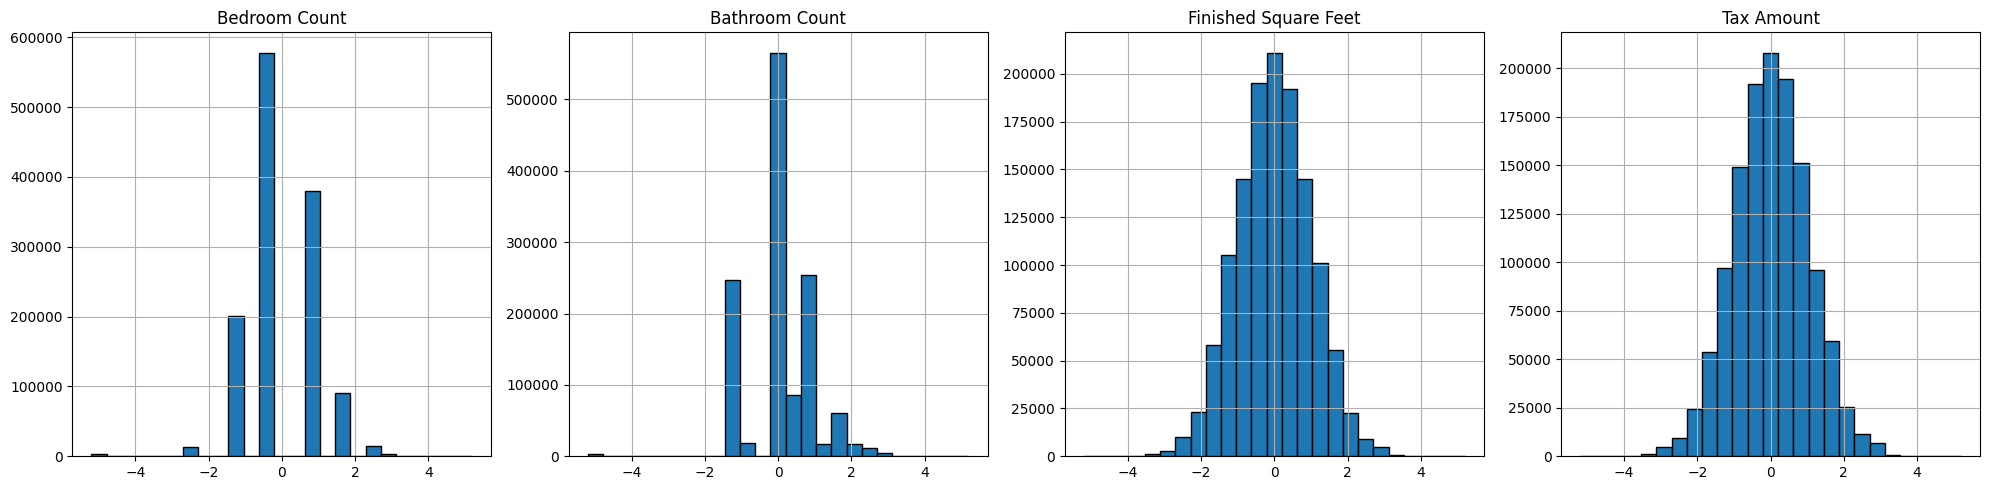

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
train_quantile.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# Standard Scaling
</div>

In [106]:
scaler = StandardScaler()
train_standard = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

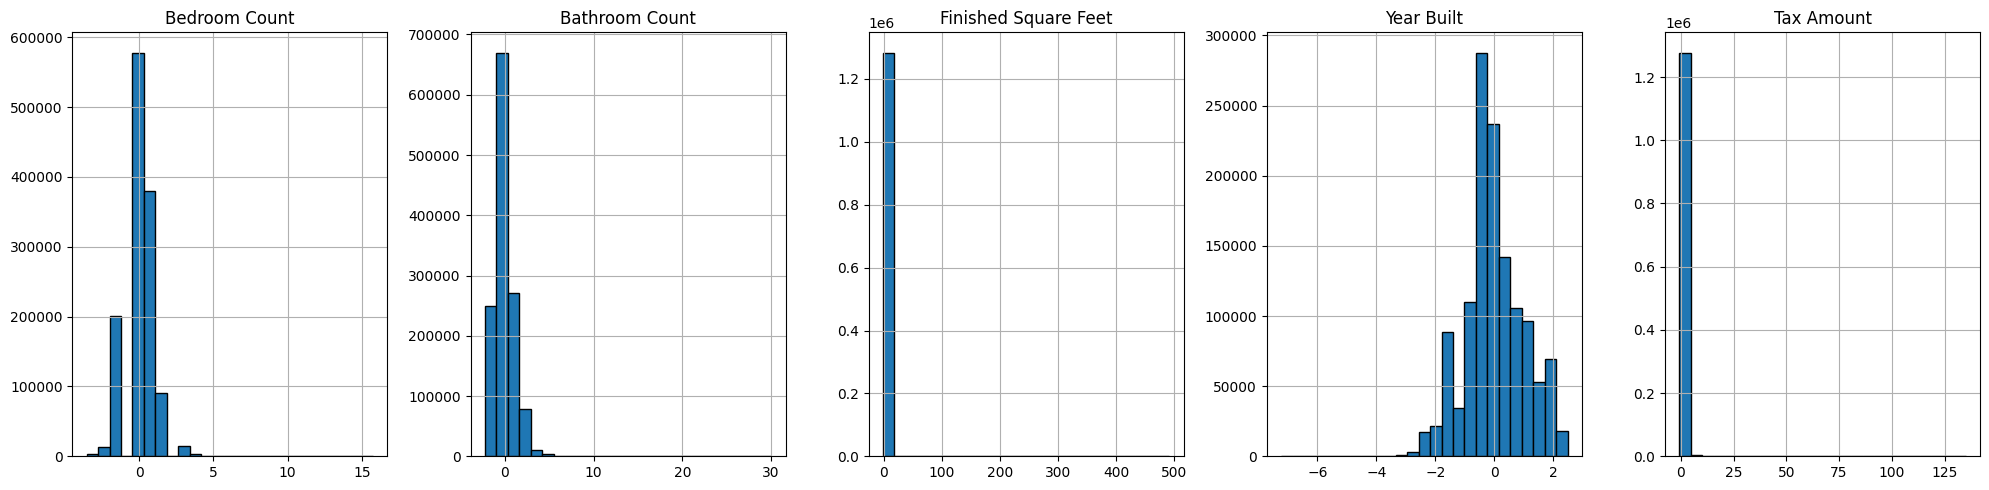

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_standard.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
# Robust Scaling
</div>

In [111]:
scaler = RobustScaler()
train_robust = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

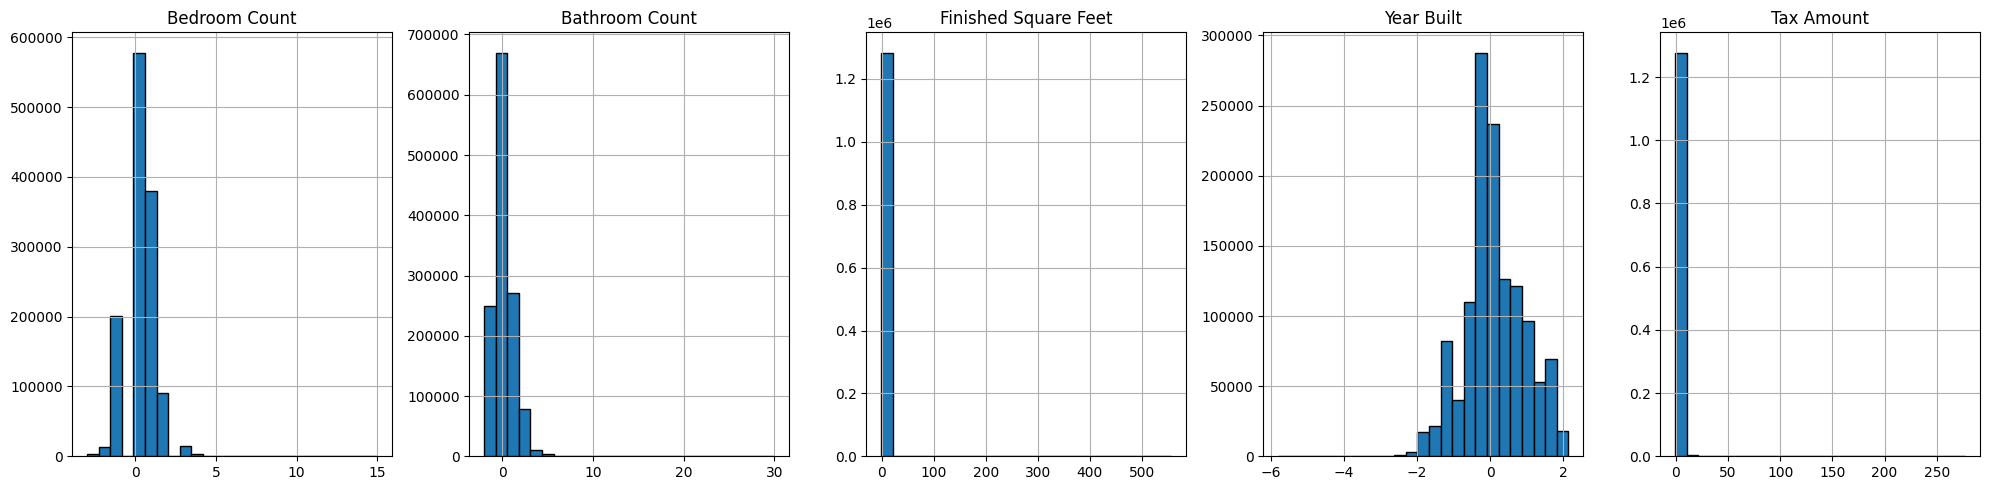

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
train_robust.hist(ax=axes, bins=25, edgecolor='black')

plt.tight_layout()
plt.show()

In [113]:
def scaling(train,validate,test):
    X_train = train.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_train = train['Tax Value']
    
    X_val= validate.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_val = validate['Tax Value']
    
    X_test = test.drop(columns=['Tax Value','FIPS','Property Land Use'])
    y_test = test['Tax Value']

    scaler = QuantileTransformer(n_quantiles=1000, random_state=123)
    train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    val_scaled = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)
    test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

    return train_scaled,val_scaled,test_scaled